In [37]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [10]:
# Load data
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# We can see lot of null values in the dataset.
# Backup the dataset
df1 = df.copy()

In [12]:
# Lets fill the mssing values
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0])
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0])

In [13]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

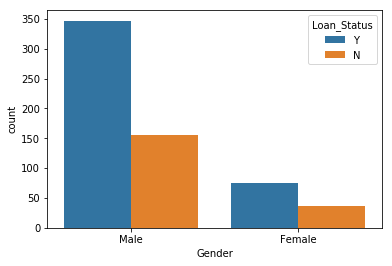

In [17]:
# Lets check the loan status gender wise
sns.countplot(x='Gender',hue='Loan_Status',data=df)

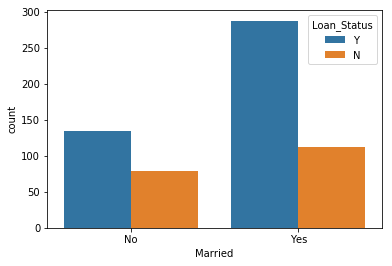

In [18]:
# Lets check the loan status for Married
sns.countplot(x='Married',hue='Loan_Status',data=df)

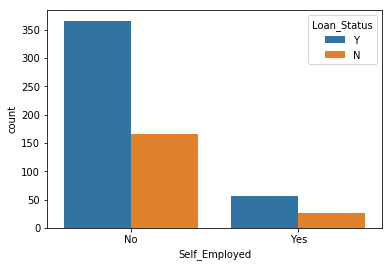

In [19]:

sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

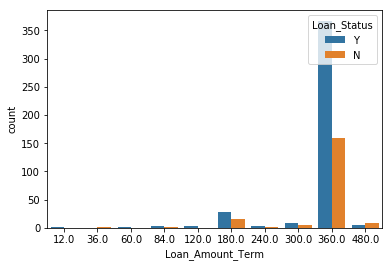

In [23]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people go for a 360 cyclic loan term.

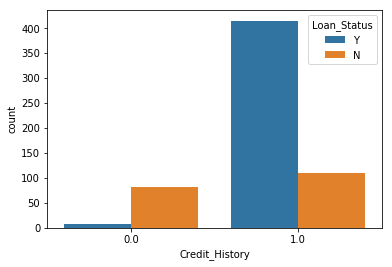

In [20]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

According to the credit history, greater number of people pay back their loans.


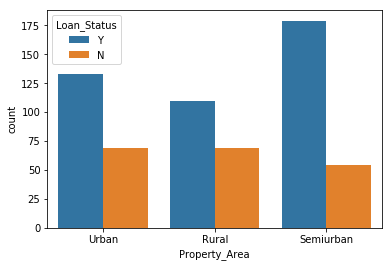

In [21]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

People in Semiurban takes more loan folowed by Urban and then Rural.

In [24]:
# Lets check columns based on their data type
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

In [26]:
# We can remove Loan_ID as it has no role on prediction
df = df.drop("Loan_ID", axis=1)


In [28]:
# Encoding numeric data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


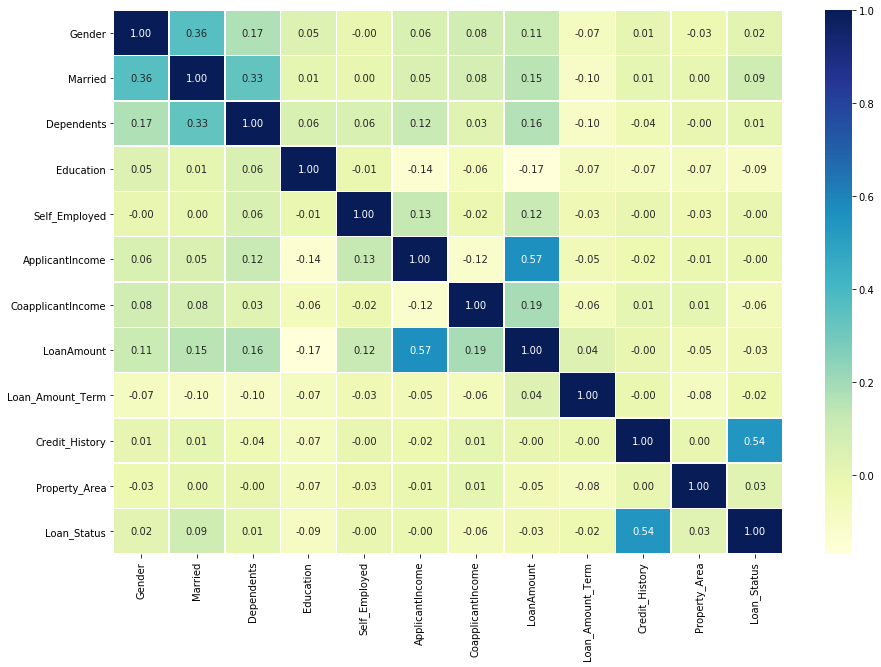

In [32]:
# Let's plot the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

Here no correlations are extremely high.

In [34]:
# Lets start modelling
# Split data into X and y
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [35]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

We're going to try below machine learning models:

* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier
* DecisionTree Classifier

In [38]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [54]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7886178861788617,
 'KNN': 0.5772357723577236,
 'Random Forest': 0.7560975609756098,
 'Decision Tree': 0.7073170731707317}

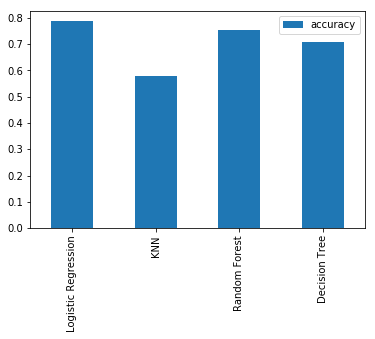

In [55]:
# Compare models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Here we can proceed with Logistic Regression and Random Forest Classifier

##### Hyperparameter tuning with RandomizedSearchCV


In [56]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [57]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [58]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [60]:
rs_log_reg.score(X_test, y_test)

0.7886178861788617

In [61]:
# Tune RandomForestClassifier
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [62]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [63]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.7886178861788617

In [64]:
# Tuning with GridSearchCV
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.2s finished


In [65]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [66]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.7886178861788617

In [51]:
# Different hyperparameters for our RandomForestClassifier model
rf_gridcv = {"n_estimators": np.arange(300, 400, 10),
           "max_depth": [5],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(10, 20, 1)}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf_grid = GridSearchCV(RandomForestClassifier() ,
                          param_grid=rf_gridcv,
                          cv = 3, 
                          verbose = True)

# Fit grid hyperparameter search model
gs_rf_grid.fit(X_train, y_train);


Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed: 17.8min finished


In [52]:
# Check the best hyperparmaters
gs_rf_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 300}

In [53]:
# Evaluate the grid search RandomForest model
gs_rf_grid.score(X_test, y_test)

0.7886178861788617

Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
* cross-validation 

To make comparisons and evaluate our trained model, first we need to make predictions.

In [76]:
y_preds = gs_rf_grid.predict(X_test)

In [77]:
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [78]:
y_test

350    1
377    1
163    1
609    1
132    1
578    1
316    1
2      1
340    0
77     0
218    0
462    1
109    1
322    1
137    1
363    1
208    1
101    1
234    1
182    1
437    1
361    1
228    1
296    1
509    1
196    1
485    1
209    0
355    1
610    1
      ..
368    1
558    1
176    1
473    1
86     1
181    0
158    1
281    1
275    1
595    1
188    1
260    1
450    0
425    1
73     0
39     1
415    1
238    1
66     0
287    1
235    1
42     1
398    1
60     1
118    0
231    1
312    1
248    1
11     1
333    1
Name: Loan_Status, Length: 123, dtype: int32

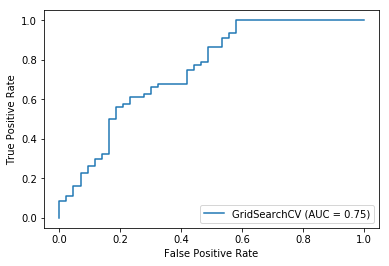

In [79]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_rf_grid, X_test, y_test)

In [81]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[18 25]
 [ 1 79]]


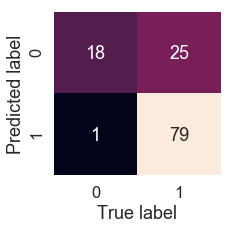

In [83]:

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test, y_preds)

In [85]:
# Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [86]:
# Check best hyperparameters
gs_rf_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 300}

In [87]:
# Create a new classifier with best parameters
clf = RandomForestClassifier( max_depth= 5,
                              min_samples_leaf= 10,
                              min_samples_split= 2,
                              n_estimators= 300)

In [88]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [89]:
cv_acc = np.mean(cv_acc)
cv_acc

0.809462881514061

In [90]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7910806823942073

In [91]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9834173669467787

In [92]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8766952317357394

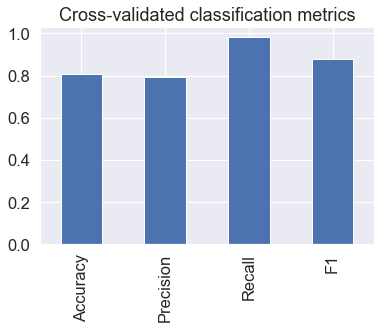

In [93]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

Note:- Among the three models gs_rf_grid gives the Highest accuracy(80%)

In [94]:
# Lets Save the model as pickle in a file
import pickle
filename = 'loan_prediction.pkl'
pickle.dump(gs_rf_grid, open(filename, 'wb'))